<a href="https://colab.research.google.com/github/vidhi2919/Gold-Price-Predictor/blob/main/Gold_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/archive (4).zip")
zip_ref.extractall('/content')
zip_ref.close()

Data Collection and Processing

In [3]:
#loading the csv data to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
#first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
#statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [11]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

correlation = gold_data.corr()
print(correlation)

             Date       SPX       GLD       USO       SLV   EUR/USD
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000


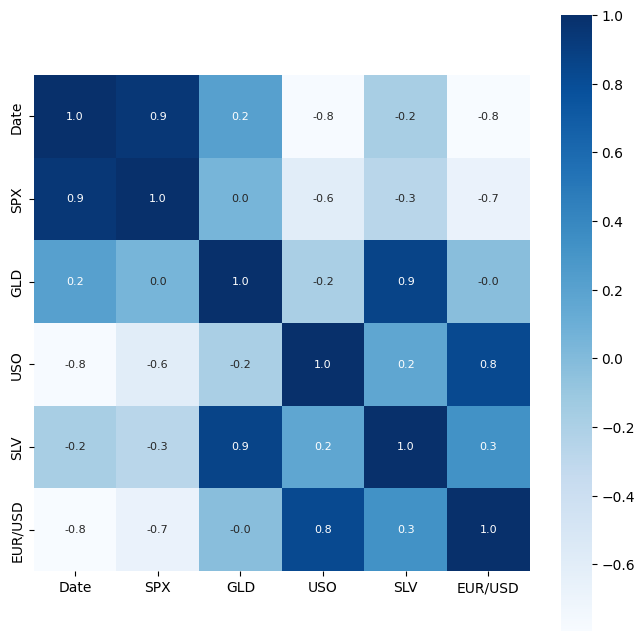

In [12]:
#heat map to understand corr
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [13]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-eb89385df74e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='orange')


<Axes: xlabel='GLD', ylabel='Density'>

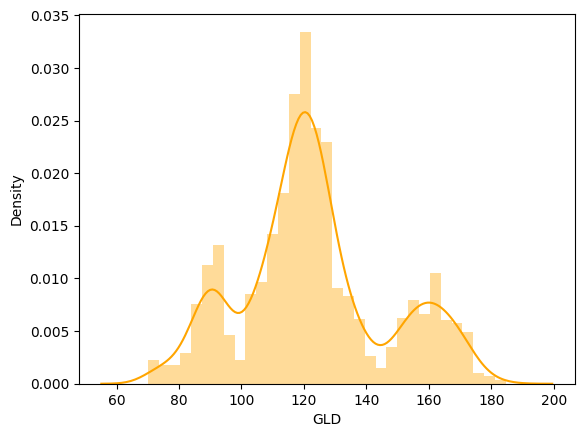

In [14]:
#checking the distribution of GLD price
sns.distplot(gold_data['GLD'],color='orange')

Splitting Features and Target

In [15]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAINING

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
regressor = RandomForestRegressor(n_estimators=100)  # Correct parameter name

In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
test_data_prediction=regressor.predict(X_test)

In [23]:
test_data_prediction

array([168.89969985,  82.26509969, 115.95410011, 127.53800075,
       120.98830121, 154.91089716, 150.40289746, 126.06180021,
       117.55769857, 126.02120061, 116.77900106, 172.49490067,
       141.5307987 , 167.86299864, 115.14579991, 117.83710055,
       137.56790284, 170.31550128, 159.51290292, 159.30899909,
       155.06079995, 125.34860018, 175.25779977, 157.15040316,
       125.15950068,  93.80549966,  77.81590012, 120.80720018,
       119.11049964, 167.46180004,  88.11420017, 125.13710028,
        91.25400071, 117.67920021, 121.14719914, 136.40460061,
       115.34600123, 115.36800073, 147.34049977, 107.17470095,
       104.48370222,  87.03859774, 126.4337005 , 117.94050001,
       152.15099918, 119.47689998, 108.4562001 , 108.19089821,
        93.16100045, 127.13219769,  75.49250035, 113.61979937,
       121.24820011, 111.37969938, 118.76099902, 120.46609936,
       159.19520043, 168.26170118, 146.98809658,  85.81909866,
        94.25510067,  86.85459892,  90.51420092, 118.95

In [25]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [26]:
print("R squared error:",error_score)

R squared error: 0.9891447989561439


Compare the Actual Values and Predicted Values in a Plot

In [27]:
Y_test=list(Y_test)

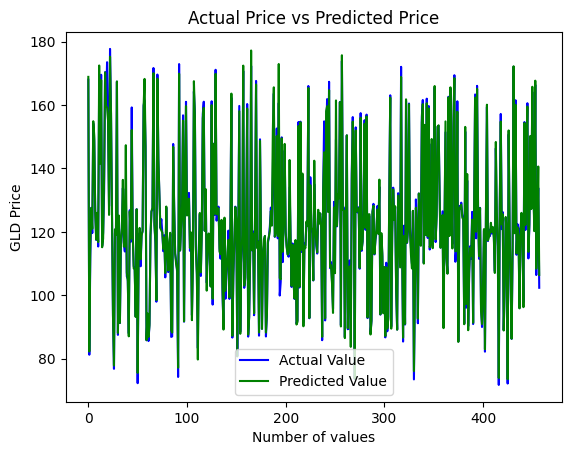

In [28]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()